In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 不偏性
## 定数項なし
定数項を含まない単純回帰モデルを想定：
$$
y_i = \beta x_i + u_i,~~~~ i = 1,\ldots,n
$$
回帰直線
$$
\hat{y} = \hat{\beta}x
$$
を引く．ここで，最小二乗推定量 $\hat{\beta}$ は
$$
\hat{\beta} = \frac{\sum_i x_iy_i}{\sum_i x_i^2}
$$
で与えられる．この最小二乗推定量は確率変数であるが，不偏性を満たすことが知られている．つまり，$\hat{\beta}$ は真の係数（パラメータ）$\beta$ と平均的に一致する．
$$
\text{E}(\hat{\beta}) = \beta.
$$
この抽象的でわかりにくい性質を，モンテカルロ・シミュレーションを通して理解する．

### データ発生過程（母集団）
$$
y_i = \beta x_i + u_i \\
\beta = 1, ~~ u_i \overset{i.i.d}{\sim} N(0, 0.02), ~~ x_i \overset{iid}{\sim} U(-0.5,0.5)
$$
この DGP からモンテカルロ標本を $J = 10^5$ 個作成し，それぞれについて最小二乗推定値 $\hat{\beta}_j$ を計算し，ヒストグラムを描画する．ヒストグラムは $\beta = 1$ を中心にしてばらつくはずである．

In [2]:
J = 10**5            # # of Monte Carlo samples
n = 30               # sample size
beta = 1             # true slope coefficient
sigsq = 0.02         # error variance
sig = np.sqrt(sigsq) # error standard deviation
x = np.random.rand(n) - 0.5 # generate x from Unif(-0.5, 0.5) and make it fixed
sum_squared = sum(x * x) # sum of squares of x

In [3]:
estimates = []
for j in range(J):
    u = np.random.normal(loc=0, scale=sig, size=n) # generate error from N(0, 0.02)
    y = beta * x + u                               # generate y
    sum_products = sum(x * y)                      # sum of cross product of x and y
    beta_hat = sum_products / sum_squared          # OLS estimator for beta
    estimates.append(beta_hat)                     # save outputs

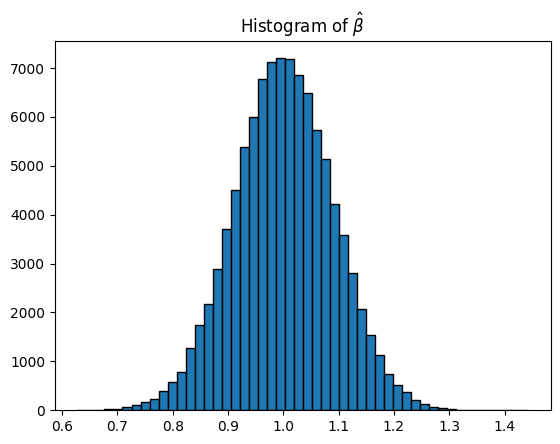

In [4]:
# plot a histogram of estimates for beta
fig, ax = plt.subplots()
ax.hist(estimates, bins=50, edgecolor="k")
ax.set_title(r"Histogram of $\hat{\beta}$");

### モンテカルロ・シミュレーションの結果
$\beta$ の最小二乗推定値の標本平均（$\text{E}(\hat{\beta})$ の近似値）は

In [5]:
sample_mean = sum(estimates) / J
sample_mean

1.000371817535159

真のパラメータ $\beta = 1$ とほぼ一致していることがわかる．つまり，最小二乗推定量 $\hat{\beta}$ が不偏推定量であることを強く示唆する実験結果が得られた．

## 定数項あり